## Loading Dataset

In [84]:
import pandas as pd
census_dataset = pd.concat(map(pd.read_csv, ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']))
census_dataset.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [85]:
# removing first column (Unnamed)
census_dataset.drop(columns=census_dataset.columns[0], axis=1,  inplace=True)
census_dataset.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [86]:
census_dataset.tail()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F
5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,$53898.889208633096,2851385M_2890732F


In [87]:
census_dataset.shape

(60, 10)

In [88]:
census_dataset.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [89]:
census_dataset.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
GenderPop    0
dtype: int64

In [90]:
census_dataset['Pacific'] = census_dataset['Pacific'].fillna(census_dataset['Pacific'].mode()[0])
census_dataset.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
GenderPop    0
dtype: int64

# Project Tasks

### 1. Make a scatterplot that shows average income in a state vs proportion of women in that state

In [91]:
census_dataset[['Male', 'Female']] = census_dataset.GenderPop.str.split("_", expand = True)
census_dataset["Male"] = census_dataset["Male"].str.replace("M","")
census_dataset["Female"] = census_dataset["Female"].str.replace("F","")
census_dataset.drop(["GenderPop"], axis=1,  inplace=True)
census_dataset.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135,19334329


In [92]:
census_dataset["Income"] = census_dataset["Income"].str.replace("$","")
census_dataset['Income'] = pd.to_numeric(census_dataset['Income'])
census_dataset['Female'] = pd.to_numeric(census_dataset['Female'])

In [93]:
census_dataset['Male'] = pd.to_numeric(census_dataset['Male'])
census_dataset['Female'].fillna(census_dataset['TotalPop'] - census_dataset['Male'], inplace=True)

In [94]:
census_dataset = census_dataset.drop_duplicates()

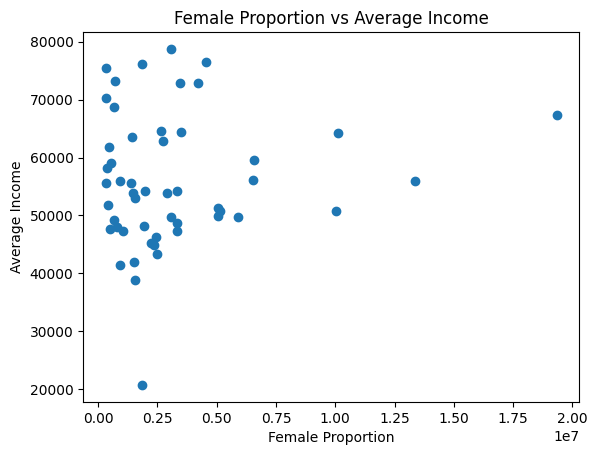

In [95]:
import matplotlib.pyplot as plt
plt.scatter(census_dataset["Female"], census_dataset["Income"])
plt.title("Female Proportion vs Average Income")
plt.xlabel("Female Proportion")
plt.ylabel("Average Income")
plt.show()

### 2. Make a bunch of histograms out of the race columns data that you have

#### Histograms will tell us which race is more prominent in United States, Obviously we know that White are more in numbers in US but lets verify it by visulizations

In [96]:
race_cols = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]
for col in race_cols:
    census_dataset[col] = census_dataset[col].str.replace("%","")
    census_dataset[col] = pd.to_numeric(census_dataset[col])

census_dataset.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int64
Female      float64
dtype: object

In [97]:
census_dataset.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int64
Female      float64
dtype: object

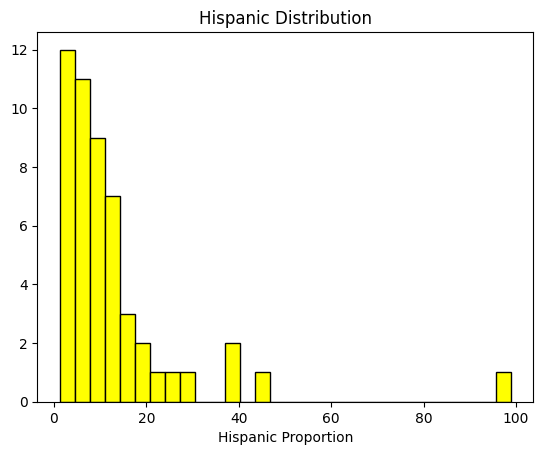

In [98]:
plt.hist(census_dataset['Hispanic'], color='yellow', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

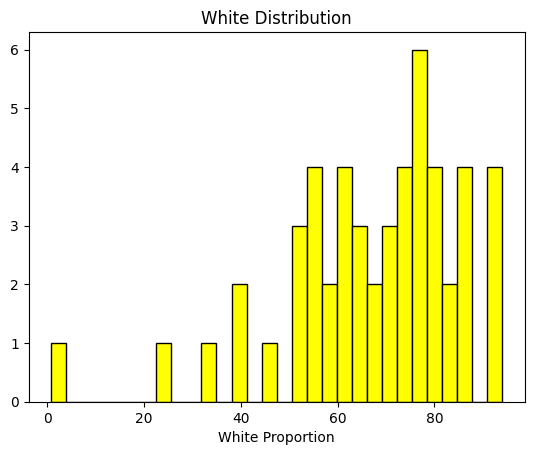

In [99]:
plt.hist(census_dataset['White'], color='yellow', edgecolor='black', bins=30)
plt.title('White Distribution')
plt.xlabel('White Proportion') 
plt.show()

## Findings of Histogram:
### We can interpret that "Whites" are more in numbers than any other race because no other histogram is moving towards right of the graph as compared to histogram for whites

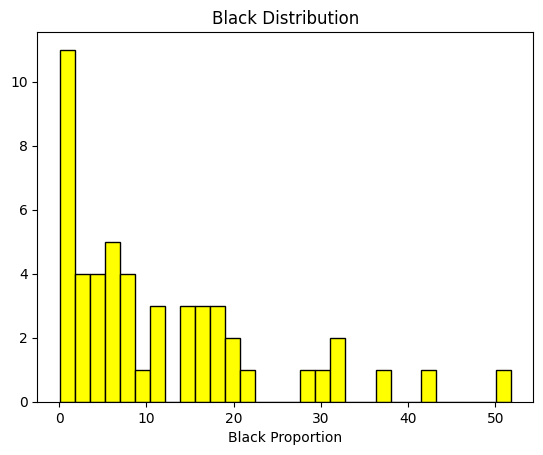

In [100]:
plt.hist(census_dataset['Black'], color='yellow', edgecolor='black', bins=30)
plt.title('Black Distribution')
plt.xlabel('Black Proportion') 
plt.show()

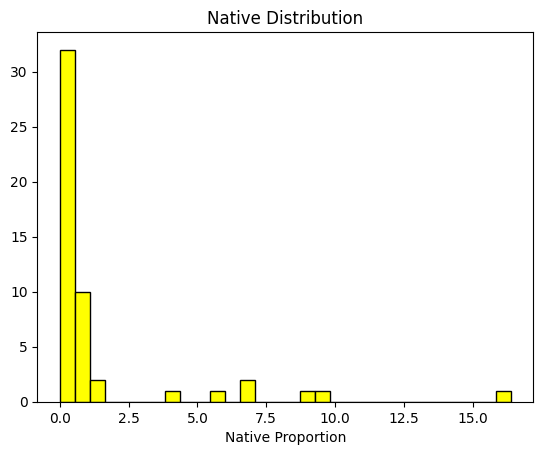

In [101]:
plt.hist(census_dataset['Native'], color='yellow', edgecolor='black', bins=30)
plt.title('Native Distribution')
plt.xlabel('Native Proportion') 
plt.show()

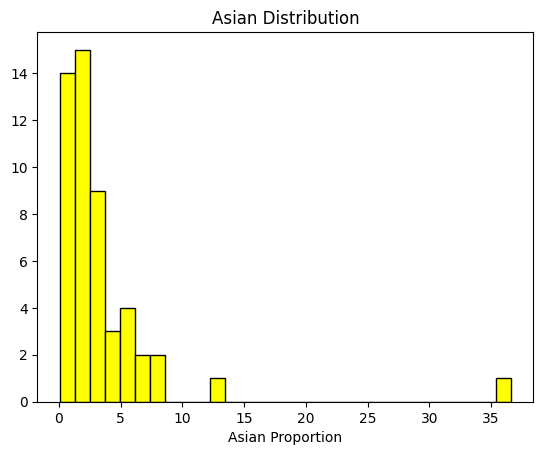

In [102]:
plt.hist(census_dataset['Asian'], color='yellow', edgecolor='black', bins=30)
plt.title('Asian Distribution')
plt.xlabel('Asian Proportion') 
plt.show()

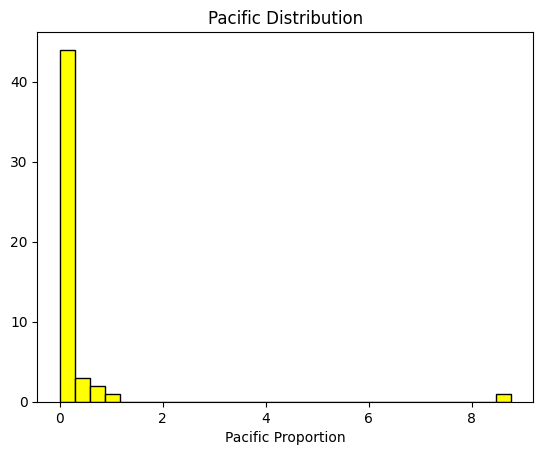

In [103]:
plt.hist(census_dataset['Pacific'], color='yellow', edgecolor='black', bins=30)
plt.title('Pacific Distribution')
plt.xlabel('Pacific Proportion') 
plt.show()